In [114]:
# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm


from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
# import pydotplus
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
file_name = '../data/AdSmartABdata.csv'
ad_df = pd.read_csv(file_name)

In [22]:
ad_df.drop('Unnamed: 0',axis=1, inplace=True)
ad_df.reset_index(drop=True)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
1238,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
1239,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
1240,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
1241,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


### Split data by browser and platform_os, and version each split as a new version of the data in dvc.

#### Split the data into 70% training, 20% validation, and 10% test sets. 

#### Train a machine learning model using 5-fold cross validation using the following 3 different algorithms:
1. Logistic Regression 
2. Decision Trees
3. XGBoost


#### Define the appropriate loss function  for the model using the validation data

Compute feature importance

Which data features are relevant to predicting the target variable?

Which data features are relevant to predicting the target variable

For each of the ML algorithms above, find the best model by tuning their hyperparameters and each time adding the tried models in MLFlow

Prepare a Dockerfile for your project so that your model can be deployed in a docker container.

In [33]:
## prepare the data
df = ad_df.copy()
df['conversion'] = df.yes
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,conversion
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


In [34]:
## drop columns we won't use
df.drop(['yes', 'no', 'auction_id'], axis=1, inplace=True)
df.head()

,experiment,date,hour,device_make,platform_os,browser,conversion
0,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
1,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
2,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
3,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
4,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


In [36]:
### Label catagorical dats
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
df['experiment'] = lb_encode.fit_transform(df['experiment'])
df['date'] = lb_encode.fit_transform(df['date'])
df['device_make'] = lb_encode.fit_transform(df['device_make'])
df['browser'] = lb_encode.fit_transform(df['browser'])
df.head()

,experiment,date,hour,device_make,platform_os,browser,conversion
0,1,2,2,4,6,2,0
1,1,1,16,13,6,1,1
2,1,3,8,13,6,1,0
3,0,5,4,43,6,4,1
4,0,0,15,13,6,1,0


In [104]:
## Scale the dataset
scaler = MinMaxScaler()
scalled = scaler.fit_transform(df)
scalled_df = pd.DataFrame(data = scalled, columns=df.columns)
scalled_df.head()

,experiment,date,hour,device_make,platform_os,browser,conversion
0,1.0,0.285714,0.086957,0.035088,1.0,0.285714,0.0
1,1.0,0.142857,0.695652,0.114035,1.0,0.142857,1.0
2,1.0,0.428571,0.347826,0.114035,1.0,0.142857,0.0
3,0.0,0.714286,0.173913,0.377193,1.0,0.571429,1.0
4,0.0,0.000000,0.652174,0.114035,1.0,0.142857,0.0


In [109]:
### split for training
data_x = scalled_df.loc[:, df.columns != 'conversion']
data_y = scalled_df['conversion']
data_x.head()

,experiment,date,hour,device_make,platform_os,browser
0,1.0,0.285714,0.086957,0.035088,1.0,0.285714
1,1.0,0.142857,0.695652,0.114035,1.0,0.142857
2,1.0,0.428571,0.347826,0.114035,1.0,0.142857
3,0.0,0.714286,0.173913,0.377193,1.0,0.571429
4,0.0,0.000000,0.652174,0.114035,1.0,0.142857


#### Split the data into 70% training, 20% validation, and 10% test sets. 

In [110]:
X_train, X_test, y_train, y_test\
    = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

X_val, X_test, y_val, y_test\
    = train_test_split(X_test, y_test, test_size=0.10, random_state=1)


In [111]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6052631578947368

In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.867816091954023

In [ ]:
## XBoost is not working on this machine

#### Mean Score after cross-validation with kfold of 5

In [115]:
lr_results = cross_val_score(lr, X_train, y_train, cv=5)
dt_result = cross_val_score(dt, X_train, y_train, cv=5)

In [116]:
print(f"Linear Regretion K=5 mean score accuracy = {round(lr_results.mean() * 100,2)} %")
print(f"Decision Tree K=5 mean score accuracy = {round(dt_result.mean() * 100,2)} %")

Linear Regretion K=5 mean score accuracy = 53.22 %
Disision Tree K=5 mean score accuracy = 54.02 %


#### Define the appropriate loss function  for the model using the validation data.

In [120]:
lr_predict = lr.predict(X_val)
lr_loss = mean_squared_error(y_val,lr_predict)

dt_predict = dt.predict(X_val)
dt_loss = mean_squared_error(y_val, dt_predict)

#### Loss Result

In [122]:
print(f'Linear R. Loss = {round(lr_loss * 100, 2)}%')
print(f'Decision R. Loss = {round(dt_loss * 100, 2)}%')

Linear R. Loss = 47.76%
Decision R. Loss = 51.34%


#### Feature Importance

<AxesSubplot:>

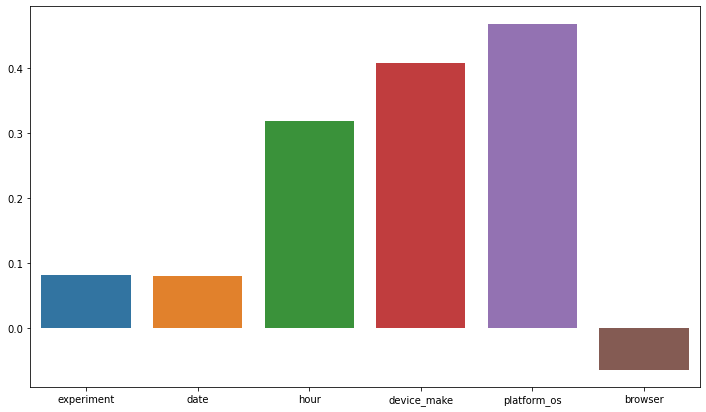

In [129]:
# Logistic Regretion
plt.figure(figsize=(12,7))
sns.barplot(X_train.columns, lr.coef_[0])

<AxesSubplot:>

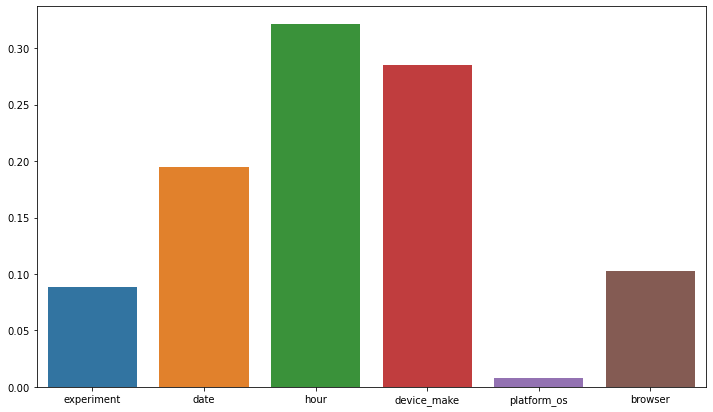

In [131]:

plt.figure(figsize=(12,7))
sns.barplot(X_train.columns, dt.feature_importances_)